# Clasificación multiclase con redes neuronales en Keras
___

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical

In [2]:

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

## Importar Dataset

In [3]:

#https://keras.io/datasets/#fashion-mnist-database-of-fashion-articles

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

## Explorar el dataset

#### Conjunto de entrenamiento

In [4]:

X_train_full.shape

(60000, 28, 28)

In [5]:

y_train_full.shape

(60000,)

#### Conjunto de prueba

In [6]:

X_test.shape

(10000, 28, 28)

In [7]:

y_test.shape

(10000,)

#### Visualizando una instancia

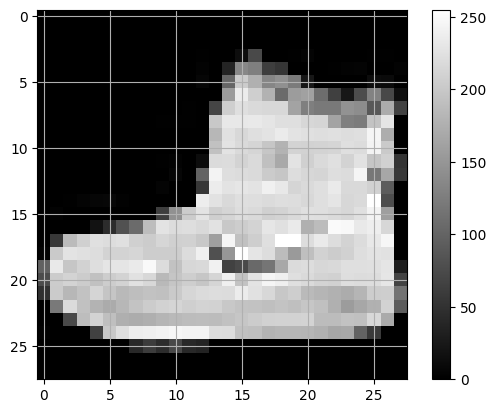

In [8]:

# Visualizar la imagen en escala de grises
plt.figure()
plt.imshow(X_train_full[0], cmap='gray')
plt.colorbar()
plt.grid(True)
plt.show()

#### Clases

In [9]:

y_train_full[0]

9

In [10]:

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                   "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [11]:

class_names[y_train_full[0]]

'Ankle boot'

#### Visualizando las primeras 25 instancias

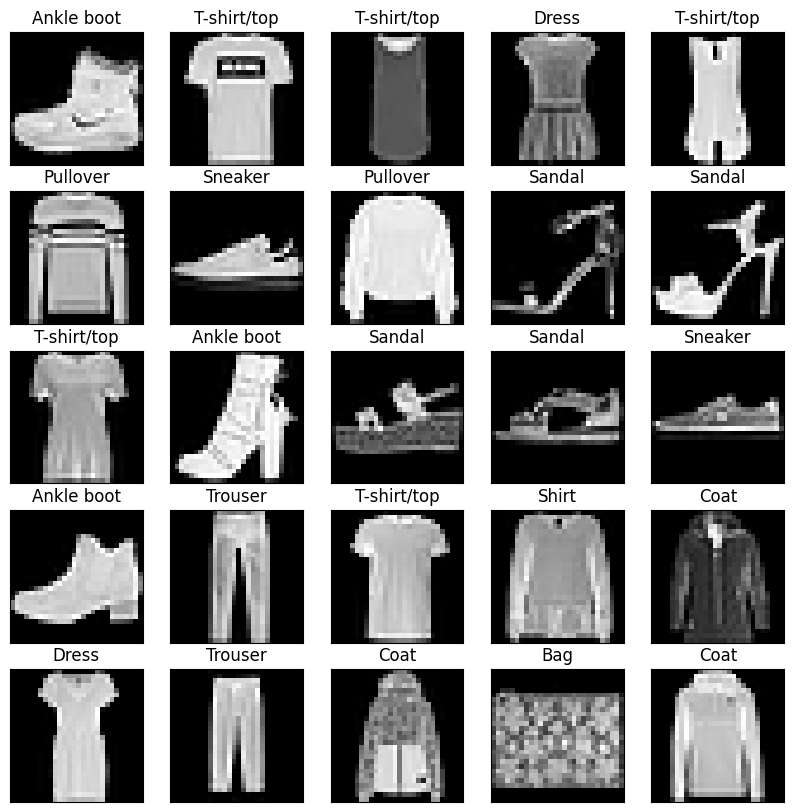

In [12]:

plt.figure(figsize=(10,10))
for i in range(0,25):
    plt.subplot(5,5, i+1)
    plt.imshow(X_train_full[i], cmap='gray')
    plt.title(class_names[(y_train_full[i])])
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
plt.show()

## Preprocesamiento

#### Escalamiento de características

In [13]:

X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [14]:

X_train_full = X_train_full / 255
X_test = X_test / 255

In [15]:

X_train_full[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Crear conjunto de validación

In [16]:

# Separar el conjunto de entrenamiento completo en validación y entrenamiento
X_train = X_train_full[:55000]
y_train = y_train_full[:55000]

X_validation = X_train_full[55000:]
y_validation = y_train_full[55000:]

In [17]:

X_validation.shape

(5000, 28, 28)

In [18]:

X_train.shape

(55000, 28, 28)

# Modelo

#### Crear el modelo y añadir capas

In [19]:

from tensorflow.keras import layers
from keras import models
from keras import regularizers

model = keras.models.Sequential()
# Capas convolucionales con regularización
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.MaxPooling2D((2, 2)))

# Dropouts para prevenir sobreajuste
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))  # Dropout layer
model.add(layers.Dense(10, activation='softmax'))

C:\Users\santi\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,474 (431.54 KB)

 Trainable params: 110,474 (431.54 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:

keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [22]:

model.layers

[<Conv2D name=conv2d, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Conv2D name=conv2d_2, built=True>,
 <MaxPooling2D name=max_pooling2d_2, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_1, built=True>]

In [23]:

X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
X_validation = X_validation.reshape((X_validation.shape[0], 28, 28, 1))

In [24]:

train_labels = to_categorical(y_train)
validation_labels = to_categorical(y_validation)
test_labels = to_categorical(y_test)

# Configurar el proceso de aprendizaje (Compilar)
Se especifica:
- Loss function
- Optimizer
- Metrics (Opcional, en caso de querer observar métricas extra durante el entrenamiento o evaluación)

In [25]:

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Entrenamiento y evaluación en datos de validación
Los datos de validación son opcionales, pero si los pasamos como parámetros en el método `fit()`, Keras medirá el loss y las demás métricas que le indiquemos sobre el conjunto de validación al final de cada época.

Se pueden pasar como parámetros los datos de validación con `validation_data`. Si se usa `validation_split`, la fracción de datos que indiquemos será usada como validación (se tomarán los datos del final del conjunto y no se usarán en el entrenamiento). `validation_data` sobrescribe `validation_split`.

- Si el performance es mucho mejor en el conjunto de entrenamiento que en el de validación hay ->

In [26]:

history = model.fit(X_train, train_labels, epochs=20, batch_size=64, 
                    validation_data=(X_validation, validation_labels))

Epoch 1/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6204 - loss: 1.1327 - val_accuracy: 0.8202 - val_loss: 0.5826
Epoch 2/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8073 - loss: 0.6187 - val_accuracy: 0.8370 - val_loss: 0.5244
Epoch 3/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8319 - loss: 0.5454 - val_accuracy: 0.8532 - val_loss: 0.4603
Epoch 4/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8492 - loss: 0.4906 - val_accuracy: 0.8622 - val_loss: 0.4407
Epoch 5/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8604 - loss: 0.4602 - val_accuracy: 0.8678 - val_loss: 0.4141
Epoch 6/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8690 - loss: 0.4382 - val_accuracy: 0.8750 - val_loss: 0.4073
Epoch 7/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8734 - loss: 0.4206 - val_accuracy: 0.8842 - val_loss: 0.3848
Epoch 8/20
860/860 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8773 - loss: 0.4043 - val_accuracy: 0.

#### History

Objeto regresado por el método `fit()` que contiene:
- Parámetros de entrenamiento
- La lísta de épocas
- Loss y métricas obtenidas al final de cada época

In [27]:

history.params
history.epoch
history.history


{'accuracy': [0.7265999913215637,
  0.8152182102203369,
  0.8374363780021667,
  0.8521999716758728,
  0.8613636493682861,
  0.8703454732894897,
  0.8748727440834045,
  0.8781818151473999,
  0.8838363885879517,
  0.8877090811729431,
  0.8888545632362366,
  0.8933818340301514,
  0.8936727046966553,
  0.8959090709686279,
  0.8996545672416687,
  0.9011090993881226,
  0.9005091190338135,
  0.9021272659301758,
  0.9040363430976868,
  0.9051818251609802],
 'loss': [0.8503735661506653,
  0.5969982147216797,
  0.5291132926940918,
  0.485049843788147,
  0.45851022005081177,
  0.4346671998500824,
  0.41765156388282776,
  0.4043786823749542,
  0.39233291149139404,
  0.38121679425239563,
  0.3741413950920105,
  0.36642152070999146,
  0.3611420691013336,
  0.3542901575565338,
  0.3461114764213562,
  0.34387755393981934,
  0.3414843678474426,
  0.335050106048584,
  0.33093395829200745,
  0.3285001516342163],
 'val_accuracy': [0.8202000260353088,
  0.8370000123977661,
  0.8532000184059143,
  0.8622000

#### Curvas de aprendizaje

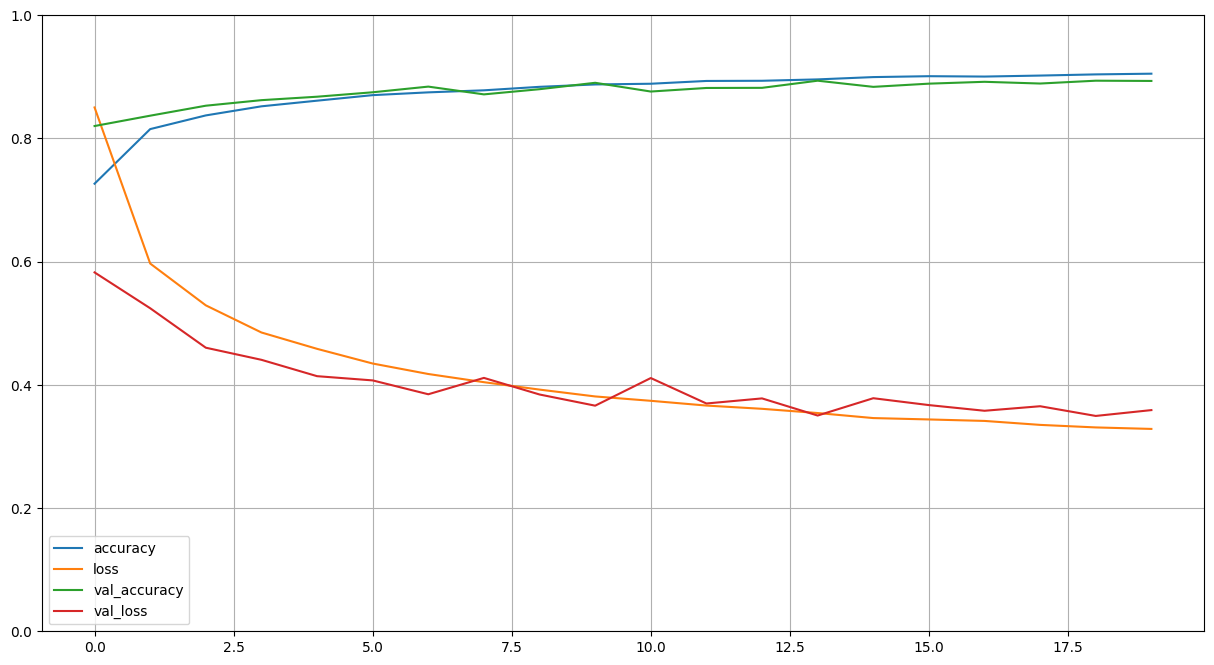

In [28]:

import pandas as pd
pd.DataFrame(history.history).plot(figsize=(15, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [29]:

#Si quisiéramos seguir entrenando usando nuestro conjunto de validación
history2 = model.fit(X_train,
                     train_labels,
                     epochs=15,
                     batch_size=32,
                     validation_data=(X_validation,validation_labels),
                     initial_epoch= 10)

Epoch 11/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8942 - loss: 0.3593 - val_accuracy: 0.8952 - val_loss: 0.3693
Epoch 12/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8991 - loss: 0.3564 - val_accuracy: 0.8756 - val_loss: 0.3983
Epoch 13/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9001 - loss: 0.3541 - val_accuracy: 0.8932 - val_loss: 0.3621
Epoch 14/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9021 - loss: 0.3442 - val_accuracy: 0.8910 - val_loss: 0.3778
Epoch 15/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8997 - loss: 0.3480 - val_accuracy: 0.8976 - val_loss: 0.3654


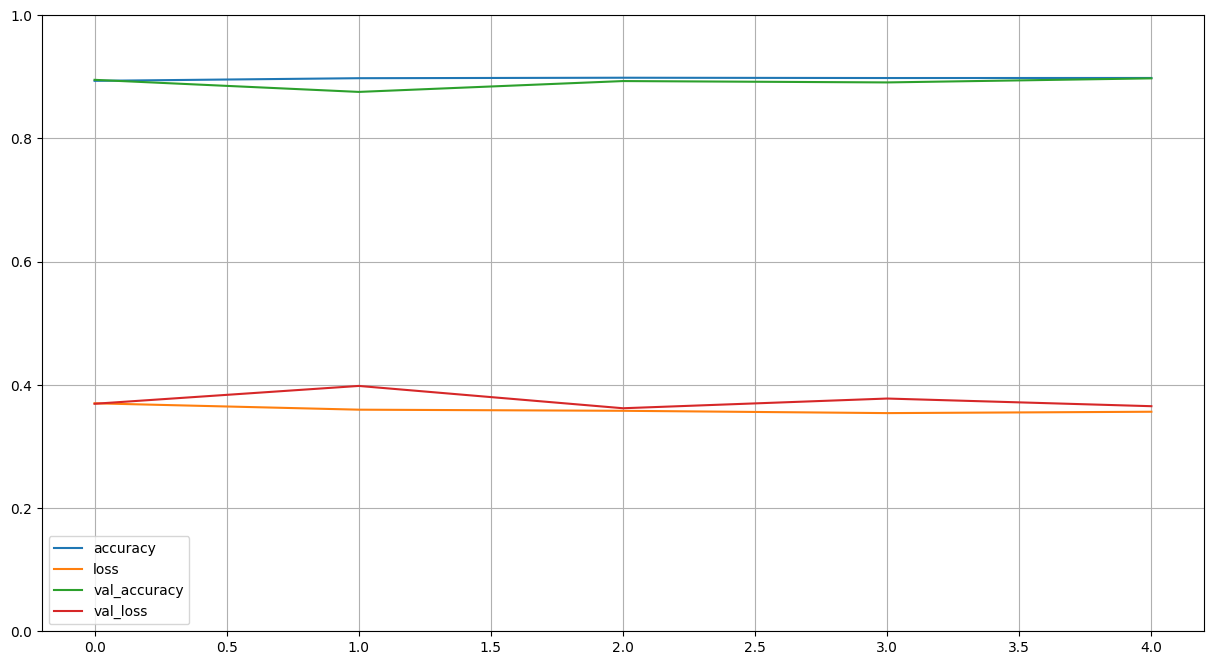

In [30]:

#Si quisiéramos ver las curvas de aprendizaje de un segundo entrenamiento
pd.DataFrame(history2.history).plot(figsize=(15, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# Evaluación en conjunto de prueba

Estimamos el error de generalización.

In [31]:

loss_and_metrics = model.evaluate(X_test, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8890 - loss: 0.3944


# Predicción en nuevos datos

In [32]:

X_new = X_test[:10]

#### Probabilidad estimada por clase

In [33]:

y_proba = model.predict(X_new).round(2)
y_proba

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.07, 0.  , 0.01, 0.  , 0.11, 0.  , 0.81, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.02, 0.01, 0.23, 0.  , 0.73, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ]],
      dtype=float32)

In [34]:

# Convertir probabilidades en clases (el índice de la clase con mayor probabilidad)
y_pred = np.argmax(y_proba, axis=1)

print(y_pred)

[9 2 1 1 6 1 4 6 5 7]


#### Clase con mayor probabilidad

In [35]:

np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt', 'Trouser',
       'Coat', 'Shirt', 'Sandal', 'Sneaker'], dtype='<U11')

In [36]:

print(y_test[:10])

[9 2 1 1 6 1 4 6 5 7]


# Guardar y restaurar el modelo

#### Guardar modelo

In [37]:

model.save('keras_fashion.keras') #En formato HDF5


#### Restaurar un modelo

In [38]:

model = keras.models.load_model('keras_fashion.keras')

In [39]:

X_new = X_test[:5] # pretend these are new instances
y_pred = model.predict(X_new)
y_pred.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.07, 0.  , 0.01, 0.  , 0.11, 0.  , 0.81, 0.  , 0.  , 0.  ]],
      dtype=float32)

1. Modifica el modelo par alcanzar un accuracy mayor al 92% pero evitando que suceda el sobreajuste.
2. En lugar de la red personalizada, utiliza un arquitectura de red más compleja como ResNet o VGG.